### Predicting Heart Disease


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.preprocessing import MinMaxScaler 

In [2]:
heart_df = pd.read_csv('heart_disease_prediction.csv')
heart_df.head()


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [4]:
heart_df.shape

(918, 12)

In [5]:
heart_df.describe(include=['object'])

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
count,918,918,918,918,918
unique,2,4,3,2,3
top,M,ASY,Normal,N,Flat
freq,725,496,552,547,460


In [6]:
heart_df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


The zero values for 'RestingBP' and 'Cholesterol' are very unlikely to be correct. 

### EDA

In [7]:
categories= ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'HeartDisease']

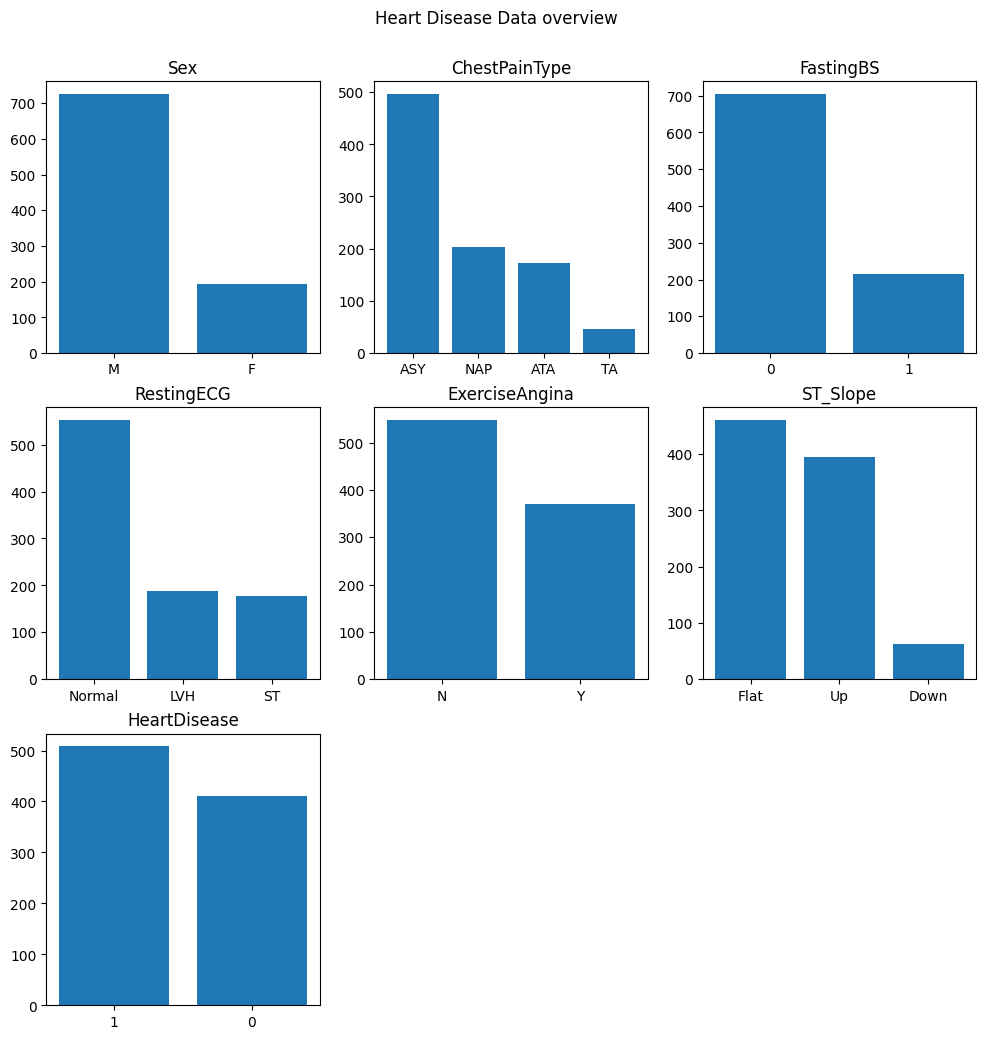

In [8]:
fig, ax = plt.subplots(3, 3, figsize=(12,12))
fig.suptitle('Heart Disease Data overview',  y=0.94)
count = 0
for i in range(3):
    for x in range(3):
        if count < len(categories):
            cat = categories[count]
            result = heart_df[cat].value_counts()
            index = result.index.astype('str')
            value = result.values
            ax[i, x].bar(index, height=value)
            ax[i, x].set_title(cat)
            count+=1
ax[2,1].set_axis_off()
ax[2,2].set_axis_off()
plt.show()

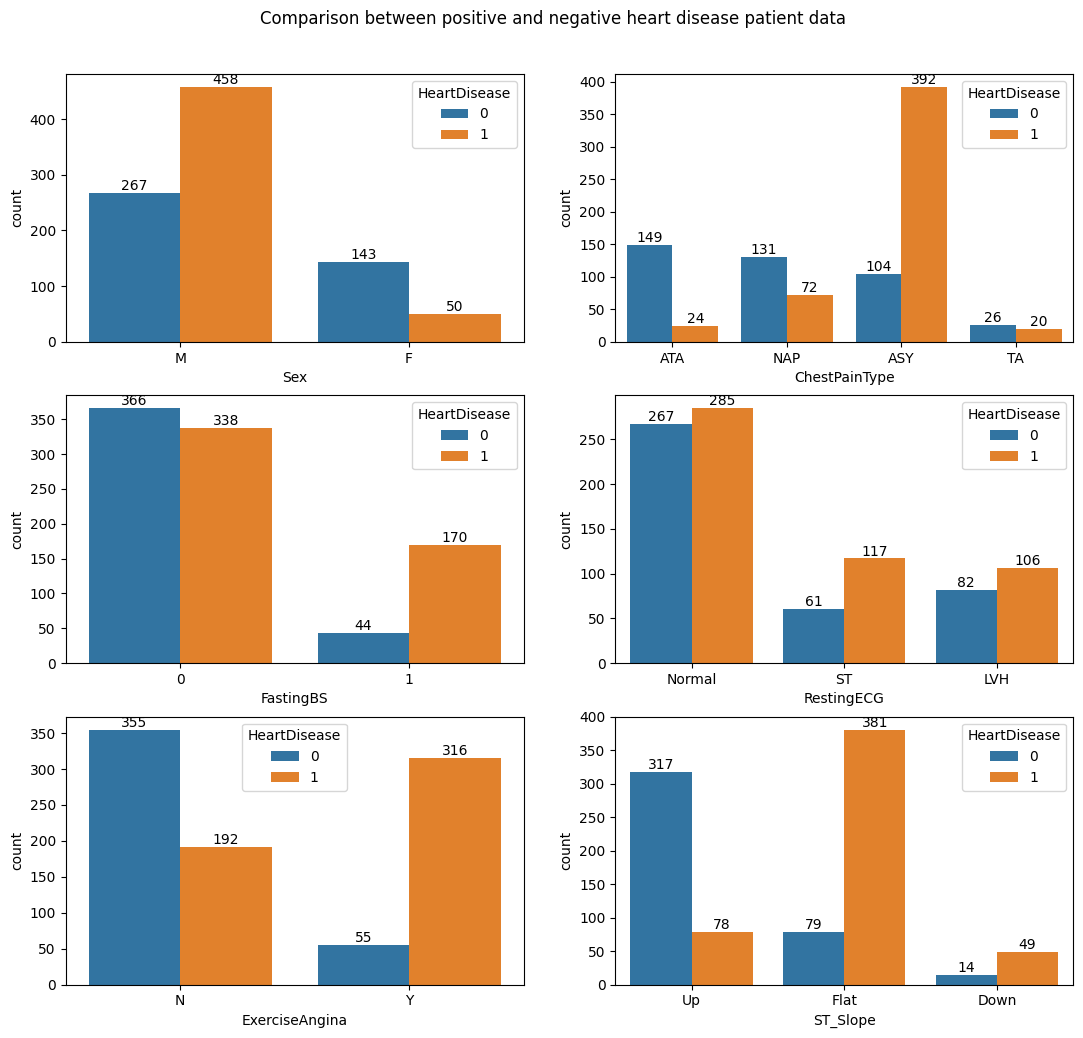

In [9]:
fig = plt.figure(figsize=(13, 16))
fig.suptitle('Comparison between positive and negative heart disease patient data', y=0.92)
for idx, col in enumerate(categories[:-1]):
    axis = plt.subplot(4, 2, idx+1)
    sns.countplot(data=heart_df, x=col, hue=heart_df["HeartDisease"].astype(str), ax=axis)
    for bar in axis.containers:
        axis.bar_label(bar, label_type='edge')
plt.show()

In [10]:
heart_df_group = heart_df.groupby('HeartDisease')
zero_disease = heart_df_group.get_group(0)
yes_disease = heart_df_group.get_group(1)
def plot_negative_heartDisease():
    """The fn plots negative heart disease 
    categorical data separately"""
    fig, ax = plt.subplots(2, 3, figsize=(12,12))
    fig.suptitle('Zero Heart Disease',  y=0.94)
    count = 0
    for i in range(2):
        for x in range(3):
            if count < len(categories)-1:
                cat = categories[count]
                result = zero_disease[cat].value_counts()
                index = result.index.astype('str')
                value = result.values
                ax[i, x].bar(index, height=value)
                ax[i, x].set_title(cat)
                count+=1
    plt.show()

def plot_positive_heartDisease():
    """The function plots positive heart disease
    catogorical data separately"""
    fig, ax = plt.subplots(2, 3, figsize=(12,12))
    fig.suptitle('Positive Heart Disease',  y=0.94)
    count = 0
    for i in range(2):
        for x in range(3):
            if count < len(categories)-1:
                cat = categories[count]
                result = yes_disease[cat].value_counts()
                index = result.index.astype('str')
                value = result.values
                ax[i, x].bar(index, height=value)
                ax[i, x].set_title(cat)
                count+=1
    plt.show()

The data is skewed towards men andshows that most men have heart disease but may depend entirely on how the data has been collected and can impact the prediction of unseen data since it could introduce bias.   
For the ChestPainType, a large number of patients were asymptomatic even though chestpain would likely be expected to be a symptom of heart disease.  

Over 170 patients with heart disease have fasting blood sugar >120 mg/dl  

high number of heart disease patients have exercise induce angina 


### Data clean up and wrangling
Some data inputs have zero values which are abnormal given the expectations of what the data should look like for a normal human been. For example RestingBP and Cholesterol cannot be zero values. These will be updated

In [11]:
zero_rBP = heart_df.loc[heart_df['RestingBP']==0].shape
zero_rBP

(1, 12)

In [12]:
zero_cholesterol = heart_df.loc[heart_df['Cholesterol']==0].shape
zero_cholesterol

(172, 12)

Based on the results above, it will be easier to drop the one column with zero resting blood pressure while the columns with zero cholesterol will be updated by the median values 

In [13]:
zero_disease['Cholesterol'].describe()

count    410.000000
mean     227.121951
std       74.634659
min        0.000000
25%      197.250000
50%      227.000000
75%      266.750000
max      564.000000
Name: Cholesterol, dtype: float64

In [14]:
yes_disease['Cholesterol'].describe()

count    508.000000
mean     175.940945
std      126.391398
min        0.000000
25%        0.000000
50%      217.000000
75%      267.000000
max      603.000000
Name: Cholesterol, dtype: float64

In [15]:
zero_disease_ch_index = zero_disease.loc[zero_disease['Cholesterol']==0].index
zero_disease_ch_median = zero_disease['Cholesterol'].median()

yes_disease_ch_index = yes_disease.loc[yes_disease['Cholesterol']==0].index
yes_disease_ch_median = yes_disease['Cholesterol'].median()

## Updating the cholesterol zero values with median values 
heart_df.loc[zero_disease_ch_index, ['Cholesterol']] = zero_disease_ch_median
heart_df.loc[yes_disease_ch_index, ['Cholesterol']] = yes_disease_ch_median

In [16]:
heart_df = heart_df.drop(heart_df.loc[heart_df['RestingBP']==0].index, axis=0)
heart_df.shape

(917, 12)

In [17]:
zero_cholesterol = heart_df.loc[heart_df['Cholesterol']==0].shape
zero_cholesterol

(0, 12)

### Feature Selection 
Age = plays a role in heart disease especially for adults
sex = out data indicated men have higher percentage of heart disease though this may be dependent of the data collection method and time.
ChestPainType = many patients were asymptomatic
cholesterol = by domain knowledge, cholesterol level plays a role
FastingBS = data shows 170 patients BS over 120mg/dl
ExerciseAngina = data shows many patients have exercise induced angina

In [18]:
### Converting to dummy variables 
heart_df = pd.get_dummies(heart_df, drop_first=True)
heart_df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,True,True,False,False,True,False,False,False,True
1,49,160,180,0,156,1.0,1,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,0,True,True,False,False,False,True,False,False,True
3,48,138,214,0,108,1.5,1,False,False,False,False,True,False,True,True,False
4,54,150,195,0,122,0.0,0,True,False,True,False,True,False,False,False,True


In [19]:
correlations = abs(heart_df.corr())
sns.set_theme()



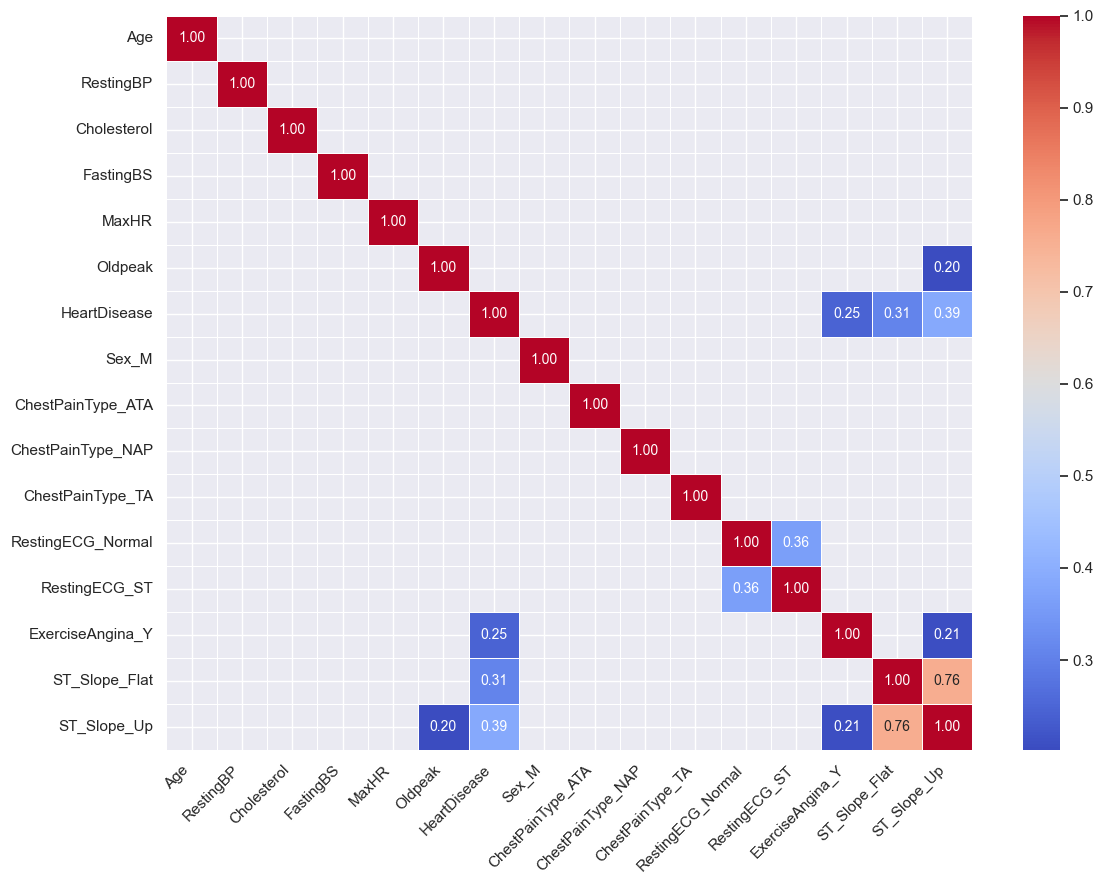

In [20]:
square_correlation = correlations**2

fig, ax = plt.subplots(figsize=(12,9))
sns.heatmap(square_correlation[square_correlation>0.2],annot=True,fmt='.2f', ax=ax, cmap='coolwarm', linewidths=0.5, annot_kws={"size": 10})
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Based on the heatmap of the correlations, oldpeak, ExercisingAngina_y, ST_slop_Flat and ST_slope_up are correlated with heart disease. Also Sex_M is included due to the plot from EDA above.  
This is purely based on the correlation coefficient results. 

### Building a classifier
the data shall be split into 80% training data set and 20% validation set

In [21]:
model_features = ['Oldpeak', 'Sex_M', 'ExerciseAngina_Y', 'ST_Slope_Flat', 'ST_Slope_Up']

X = heart_df.drop(['HeartDisease'], axis=1)
y = heart_df['HeartDisease']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=3)


for item in model_features:
    neigh = KNeighborsClassifier(n_neighbors=5)
    neigh.fit(X_train[[item]], y_train)
    accuracy = neigh.score(X_val[[item]], y_val)
    print(f'The model accuracy for {item} is {accuracy*100:.2f}%')

The model accuracy for Oldpeak is 71.20%
The model accuracy for Sex_M is 52.17%
The model accuracy for ExerciseAngina_Y is 78.26%
The model accuracy for ST_Slope_Flat is 80.43%
The model accuracy for ST_Slope_Up is 80.43%


The ST_slop_Flat and ST_Slope_Up have greater accuracies of up to 80% compared to other features with Sex_M just about 50% accurate.

### Modeling with multiple features and scaling the features


In [22]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train[model_features])
X_val_scaled = scaler.transform(X_val[model_features])
n_values = list(range(1, 6))

for value in n_values:
    knn = KNeighborsClassifier(n_neighbors=value)
    knn.fit(X_train_scaled, y_train)
    accuracy = knn.score(X_val_scaled, y_val)
    print(f'For {value} neighbors, accuracy is {accuracy*100:.2f}%.')

For 1 neighbors, accuracy is 75.00%.
For 2 neighbors, accuracy is 73.37%.
For 3 neighbors, accuracy is 81.52%.
For 4 neighbors, accuracy is 81.52%.
For 5 neighbors, accuracy is 82.07%.


Testing the model accuracy with all the features and n values between 1 and 5, indicates an increase to 82%

### Hyperparameter Otpimisation with GridsearchCV

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train[model_features])


scores = {'n_neighbors':range(1, 20),
         'metric':['manhattan', 'minkowski']}

knn = KNeighborsClassifier()
grid_search = GridSearchCV(estimator=knn, param_grid=scores, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)
best_score = grid_search.best_score_
best_param = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print(f'best score is {best_score*100}')
print(f'best parameters: {best_param}')
print(f'best_estimator is {best_estimator}')


best score is 85.54002422886964
best parameters: {'metric': 'manhattan', 'n_neighbors': 12}
best_estimator is KNeighborsClassifier(metric='manhattan', n_neighbors=12)


The best model has accuracy score or 85.5% and with 12 n_neighbors


### Model Evaluation Test

In [24]:
X_test_scaled = scaler.transform(X_test[model_features])

accuracy = best_estimator.score(X_test_scaled, y_test)
print(f"The model's prediction test accuracy is {accuracy*100:.2f}%")

The model's prediction test accuracy is 83.15%


#### Conclusion
The test accuracy of the model turned out to be lower than the prediction accuracy. This means that the model is likely to predict correctly a patient with Heart disease approx 83% of the time. 

Though this is not a well perfomring model, the model can still be improved and retrained and one potential approach would be to drop Sex_M as one of the features for the model and retrain and test the model since the data was skewed towards men.  